# Masking homologous reference regions to minimize ambiguous alignments



In [1]:
import datetime
print(str(datetime.datetime.now()))

2021-12-06 08:14:00.477778


In [2]:
import numpy as np
np.__version__

'1.21.4'

In [3]:
import pandas as pd
pd.__version__

'1.3.4'

In [4]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [7]:
default_max_colwidth=pd.get_option('display.max_colwidth')
pd.set_option('display.max_colwidth', 1000)

In [8]:
default_max_rows=pd.get_option('display.max_rows')
pd.set_option('display.max_rows',10000)

In [9]:
df=pd.read_csv("bowtie2_report.csv",sep=",")
df.head()

,sample,read count,average length,raw AC_000005.1,RM AC_000005.1,hg38 AC_000005.1,RM+hg38 AC_000005.1,raw AC_000007.1,RM AC_000007.1,hg38 AC_000007.1,...,hg38 NC_028459.1,RM+hg38 NC_028459.1,raw NC_038524.1,RM NC_038524.1,hg38 NC_038524.1,RM+hg38 NC_038524.1,raw NC_038889.1,RM NC_038889.1,hg38 NC_038889.1,RM+hg38 NC_038889.1
0,02-2485-10A-01D-1494,478851061,101,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,06-0125-10A-01D-1490,695377506,101,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,06-0157-10A-01D-1491,561676819,101,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,06-0171-10A-01D-A33C,721570484,101,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,06-0190-10B-01D-A32W,522679939,101,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.shape

(28, 107)

In [11]:
# Example of first record
df.iloc[0]

sample                 02-2485-10A-01D-1494
read count                        478851061
average length                          101
raw AC_000005.1                           0
RM AC_000005.1                            0
hg38 AC_000005.1                          0
RM+hg38 AC_000005.1                       0
raw AC_000007.1                           0
RM AC_000007.1                            0
hg38 AC_000007.1                          0
RM+hg38 AC_000007.1                       0
raw AC_000017.1                           0
RM AC_000017.1                            0
hg38 AC_000017.1                          0
RM+hg38 AC_000017.1                       0
raw AC_000018.1                           0
RM AC_000018.1                            0
hg38 AC_000018.1                          0
RM+hg38 AC_000018.1                       0
raw AC_000019.1                           0
RM AC_000019.1                            0
hg38 AC_000019.1                          0
RM+hg38 AC_000019.1             

In [12]:
#df=df.iloc[0:91]

In [13]:
df=df.set_index(['sample','read count','average length'])
df.head()

,,,raw AC_000005.1,RM AC_000005.1,hg38 AC_000005.1,RM+hg38 AC_000005.1,raw AC_000007.1,RM AC_000007.1,hg38 AC_000007.1,RM+hg38 AC_000007.1,raw AC_000017.1,RM AC_000017.1,...,hg38 NC_028459.1,RM+hg38 NC_028459.1,raw NC_038524.1,RM NC_038524.1,hg38 NC_038524.1,RM+hg38 NC_038524.1,raw NC_038889.1,RM NC_038889.1,hg38 NC_038889.1,RM+hg38 NC_038889.1
sample,read count,average length,,,,,,,,,,,,,,,,,,,,,
02-2485-10A-01D-1494,478851061,101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0125-10A-01D-1490,695377506,101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0157-10A-01D-1491,561676819,101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0171-10A-01D-A33C,721570484,101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0190-10B-01D-A32W,522679939,101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
idx = df.columns.str.split(' ', expand=True)
idx

MultiIndex([(    'raw', 'AC_000005.1'),
            (     'RM', 'AC_000005.1'),
            (   'hg38', 'AC_000005.1'),
            ('RM+hg38', 'AC_000005.1'),
            (    'raw', 'AC_000007.1'),
            (     'RM', 'AC_000007.1'),
            (   'hg38', 'AC_000007.1'),
            ('RM+hg38', 'AC_000007.1'),
            (    'raw', 'AC_000017.1'),
            (     'RM', 'AC_000017.1'),
            ...
            (   'hg38', 'NC_028459.1'),
            ('RM+hg38', 'NC_028459.1'),
            (    'raw', 'NC_038524.1'),
            (     'RM', 'NC_038524.1'),
            (   'hg38', 'NC_038524.1'),
            ('RM+hg38', 'NC_038524.1'),
            (    'raw', 'NC_038889.1'),
            (     'RM', 'NC_038889.1'),
            (   'hg38', 'NC_038889.1'),
            ('RM+hg38', 'NC_038889.1')],
           length=104)

In [15]:
df.columns = idx
df.head()

,,,raw,RM,hg38,RM+hg38,raw,RM,hg38,RM+hg38,raw,RM,...,hg38,RM+hg38,raw,RM,hg38,RM+hg38,raw,RM,hg38,RM+hg38
,,,AC_000005.1,AC_000005.1,AC_000005.1,AC_000005.1,AC_000007.1,AC_000007.1,AC_000007.1,AC_000007.1,AC_000017.1,AC_000017.1,...,NC_028459.1,NC_028459.1,NC_038524.1,NC_038524.1,NC_038524.1,NC_038524.1,NC_038889.1,NC_038889.1,NC_038889.1,NC_038889.1
sample,read count,average length,,,,,,,,,,,,,,,,,,,,,
02-2485-10A-01D-1494,478851061,101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0125-10A-01D-1490,695377506,101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0157-10A-01D-1491,561676819,101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0171-10A-01D-A33C,721570484,101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0190-10B-01D-A32W,522679939,101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#data_columns=df.columns
#data_columns

## Note and drop accession groups with all zeroes

In [17]:
df.sum()['raw',:]

AC_000005.1         0
AC_000007.1         0
AC_000017.1         0
AC_000018.1         0
AC_000019.1         0
NC_000898.1    521897
NC_001352.1         0
NC_001357.1         0
NC_001405.1         0
NC_001460.1         0
NC_001587.1         0
NC_001593.1         0
NC_001664.4    521973
NC_001716.2    507793
NC_001798.2      1947
NC_001806.2      4283
NC_006273.2         2
NC_006577.2         0
NC_007605.1      9852
NC_009333.1       750
NC_009334.1        26
NC_011203.1         0
NC_020890.1         0
NC_028459.1         0
NC_038524.1         0
NC_038889.1         0
dtype: int64

In [18]:
rawzeroes=df.sum()['raw',:]==0
rawzeroes[rawzeroes==True].index
rawzeroes=rawzeroes[rawzeroes==True].index
rawzeroes

Index(['AC_000005.1', 'AC_000007.1', 'AC_000017.1', 'AC_000018.1',
       'AC_000019.1', 'NC_001352.1', 'NC_001357.1', 'NC_001405.1',
       'NC_001460.1', 'NC_001587.1', 'NC_001593.1', 'NC_006577.2',
       'NC_011203.1', 'NC_020890.1', 'NC_028459.1', 'NC_038524.1',
       'NC_038889.1'],
      dtype='object')

In [19]:
df.columns.get_level_values(1).isin(rawzeroes)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [20]:
df=df.iloc[:,~df.columns.get_level_values(1).isin(rawzeroes)]

In [21]:
df.shape

(28, 36)

## Normalize by read count to hits per million or billion

In [22]:
idx = df.columns

In [23]:
df=df.reset_index()
df.head()

sample read count average length         raw          RM  \
                                                  NC_000898.1 NC_000898.1   
0  02-2485-10A-01D-1494  478851061            101       15805           1   
1  06-0125-10A-01D-1490  695377506            101       21666           3   
2  06-0157-10A-01D-1491  561676819            101       18291           3   
3  06-0171-10A-01D-A33C  721570484            101       24423           5   
4  06-0190-10B-01D-A32W  522679939            101       16427           3   

         hg38     RM+hg38         raw          RM        hg38  ...  \
  NC_000898.1 NC_000898.1 NC_001664.4 NC_001664.4 NC_001664.4  ...   
0           0           0       15951           8           0  ...   
1           0           0       21780          12           0  ...   
2           0           0       18466          11           0  ...   
3           0           0       24571          10           1  ...   
4           0           0       16519          21           0  ...   

                  RM+hg38         raw          RM        hg38     RM+hg38  \
  NC_007605.1 NC_007605.1 NC_009333.1 NC_009333.1 NC_009333.1 NC_009333.1   
0           0           0          24          24           0           1   
1           0           0          37          37           0           0   
2           0           0          22          22           0           0   
3           0           0          44          44           1           1   
4           0           0          27          26           1           1   

          raw          RM        hg38     RM+hg38  
  NC_009334.1 NC_009334.1 NC_009334.1 NC_009334.1  
0           0           0           0           0  
1           1           1           1           1  
2           0           0           0           0  
3           0           0           0           0  
4           0           0           0           0  

[5 rows x 39 columns]

In [24]:
df[idx]=(1e9*df[idx].values)/df[['read count']].values
df.head()

sample read count average length           raw          RM  \
                                                    NC_000898.1 NC_000898.1   
0  02-2485-10A-01D-1494  478851061            101  33006.087461    2.088332   
1  06-0125-10A-01D-1490  695377506            101  31157.176948    4.314203   
2  06-0157-10A-01D-1491  561676819            101  32564.990011    5.341150   
3  06-0171-10A-01D-A33C  721570484            101  33847.005305    6.929330   
4  06-0190-10B-01D-A32W  522679939            101  31428.411106    5.739650   

         hg38     RM+hg38           raw          RM        hg38  ...  \
  NC_000898.1 NC_000898.1   NC_001664.4 NC_001664.4 NC_001664.4  ...   
0         0.0         0.0  33310.983935   16.706656    0.000000  ...   
1         0.0         0.0  31321.116677   17.256814    0.000000  ...   
2         0.0         0.0  32876.557079   19.584216    0.000000  ...   
3         0.0         0.0  34052.113473   13.858660    1.385866  ...   
4         0.0         0.0  31604.427045   40.177551    0.000000  ...   

                  RM+hg38         raw          RM        hg38     RM+hg38  \
  NC_007605.1 NC_007605.1 NC_009333.1 NC_009333.1 NC_009333.1 NC_009333.1   
0         0.0         0.0   50.119968   50.119968    0.000000    2.088332   
1         0.0         0.0   53.208509   53.208509    0.000000    0.000000   
2         0.0         0.0   39.168431   39.168431    0.000000    0.000000   
3         0.0         0.0   60.978104   60.978104    1.385866    1.385866   
4         0.0         0.0   51.656852   49.743635    1.913217    1.913217   

          raw          RM        hg38     RM+hg38  
  NC_009334.1 NC_009334.1 NC_009334.1 NC_009334.1  
0    0.000000    0.000000    0.000000    0.000000  
1    1.438068    1.438068    1.438068    1.438068  
2    0.000000    0.000000    0.000000    0.000000  
3    0.000000    0.000000    0.000000    0.000000  
4    0.000000    0.000000    0.000000    0.000000  

[5 rows x 39 columns]

## Compare each virus by reference type (raw, RM, hg38masked, RMhg38masked)

In [25]:
viruses=pd.read_csv("select_viruses.csv",sep="\t",header=None,names=['accession','description'])
viruses

,accession,description
0,AC_000005.1,"Human_mastadenovirus_A,_complete_genome"
1,AC_000007.1,"Human_adenovirus_2,_complete_genome"
2,AC_000017.1,"Human_adenovirus_type_1,_complete_genome"
3,AC_000018.1,"Human_adenovirus_type_7,_complete_genome"
4,AC_000019.1,"Human_adenovirus_type_35,_complete_genome"
5,NC_000898.1,"Human_herpesvirus_6B,_complete_genome"
6,NC_001352.1,"Human_papillomavirus_-_2,_complete_genome"
7,NC_001357.1,"Human_papillomavirus_-_18,_complete_genome"
8,NC_001405.1,"Human_adenovirus_C,_complete_genome"
9,NC_001460.1,"Human_adenovirus_A,_complete_genome"


In [26]:
viruses=viruses[~viruses['accession'].isin(rawzeroes)]

In [27]:
df=df.set_index(['sample','read count','average length'])

In [28]:
df.iloc[:, df.columns.get_level_values(1)=='NC_000898.1']

,,,raw,RM,hg38,RM+hg38
,,,NC_000898.1,NC_000898.1,NC_000898.1,NC_000898.1
sample,read count,average length,,,,
02-2485-10A-01D-1494,478851061,101,33006.087461,2.088332,0.000000,0.000000
06-0125-10A-01D-1490,695377506,101,31157.176948,4.314203,0.000000,0.000000
06-0157-10A-01D-1491,561676819,101,32564.990011,5.341150,0.000000,0.000000
06-0171-10A-01D-A33C,721570484,101,33847.005305,6.929330,0.000000,0.000000
06-0190-10B-01D-A32W,522679939,101,31428.411106,5.739650,0.000000,0.000000
06-0210-10A-01D-1491,628825315,101,31703.558245,0.000000,0.000000,0.000000
06-0211-10A-01D-1491,762041774,101,28020.773570,5.249056,0.000000,0.000000
06-0214-10A-01D-1491,573345114,101,31562.142169,0.000000,0.000000,0.000000


In [29]:
df.iloc[:, df.columns.get_level_values(1)=='NC_000898.1'].sum()['raw','NC_000898.1']

897344.2191358263

raw      NC_000898.1    897344.219136
RM       NC_000898.1     28277.893007
hg38     NC_000898.1     28265.167391
RM+hg38  NC_000898.1     28100.253276
dtype: float64


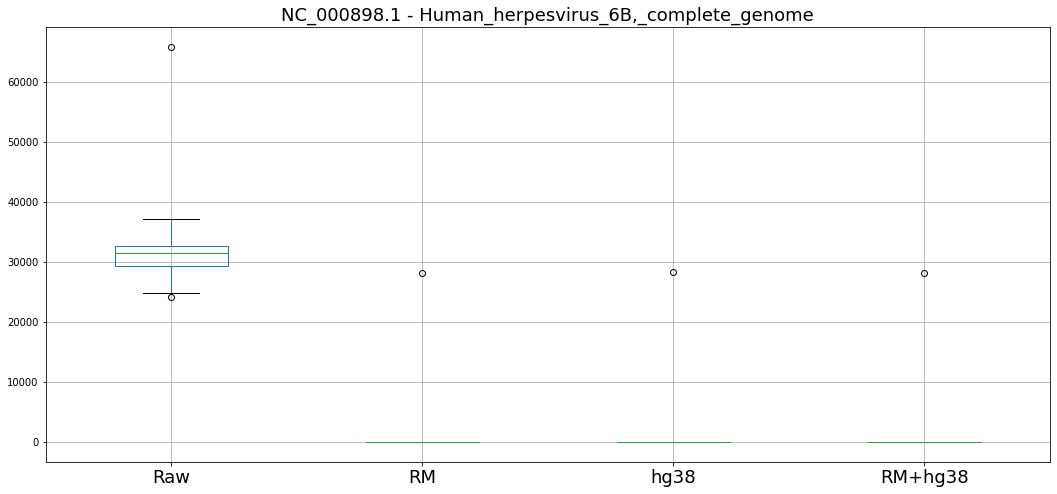

raw      NC_001664.4    896869.761821
RM       NC_001664.4     21040.839825
hg38     NC_001664.4     20447.148184
RM+hg38  NC_001664.4     20458.733091
dtype: float64


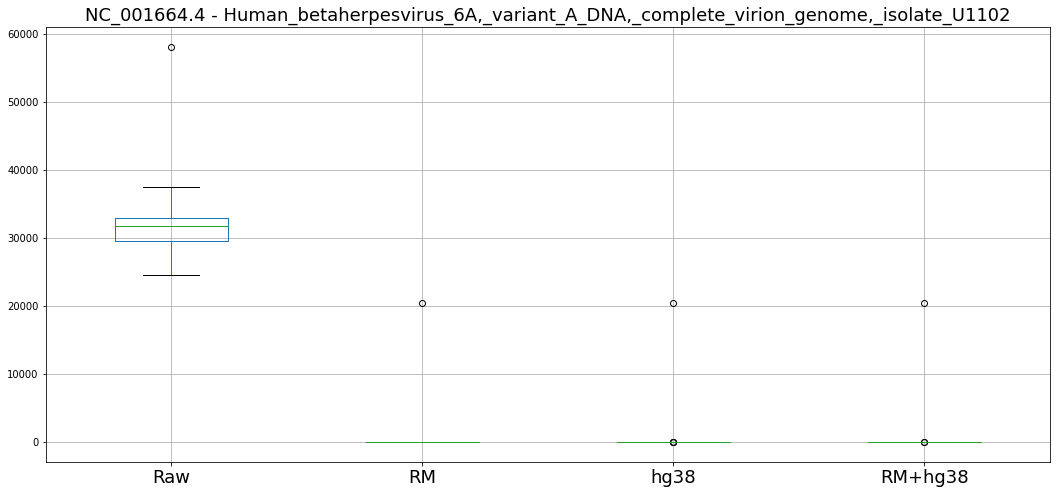

raw      NC_001716.2    870938.795277
RM       NC_001716.2    872505.185677
hg38     NC_001716.2         5.688978
RM+hg38  NC_001716.2         3.960425
dtype: float64


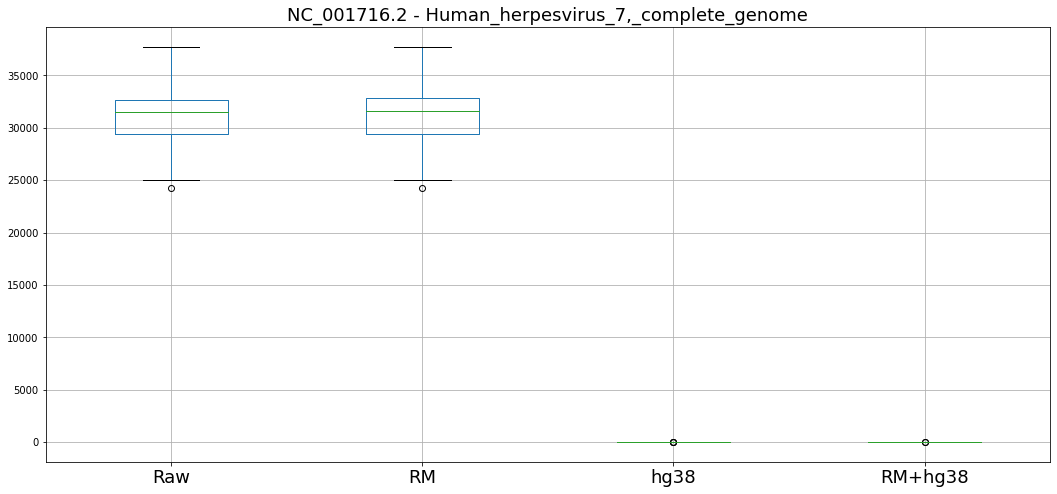

raw      NC_001798.2    3241.915984
RM       NC_001798.2    3145.736792
hg38     NC_001798.2      19.072489
RM+hg38  NC_001798.2      16.358156
dtype: float64


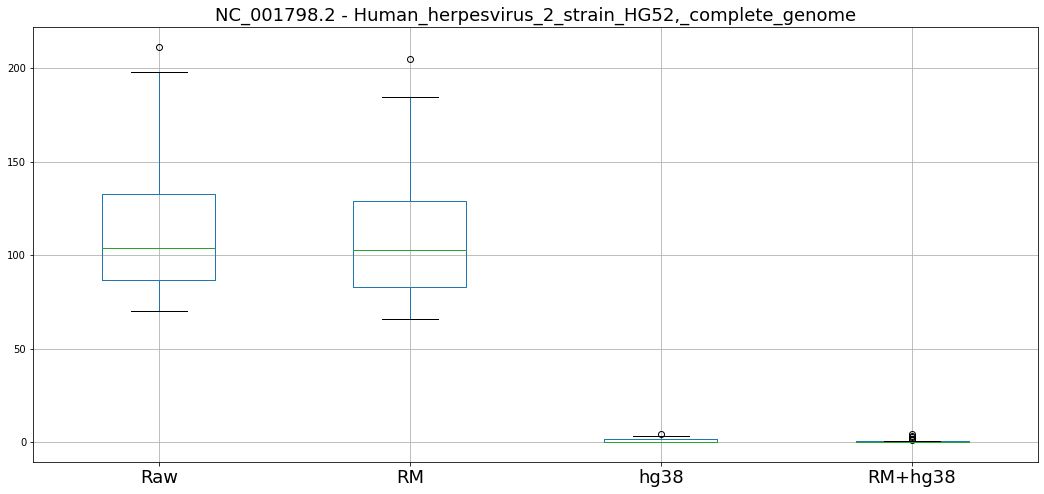

raw      NC_001806.2    7229.496546
RM       NC_001806.2     836.344295
hg38     NC_001806.2      86.153503
RM+hg38  NC_001806.2      81.793976
dtype: float64


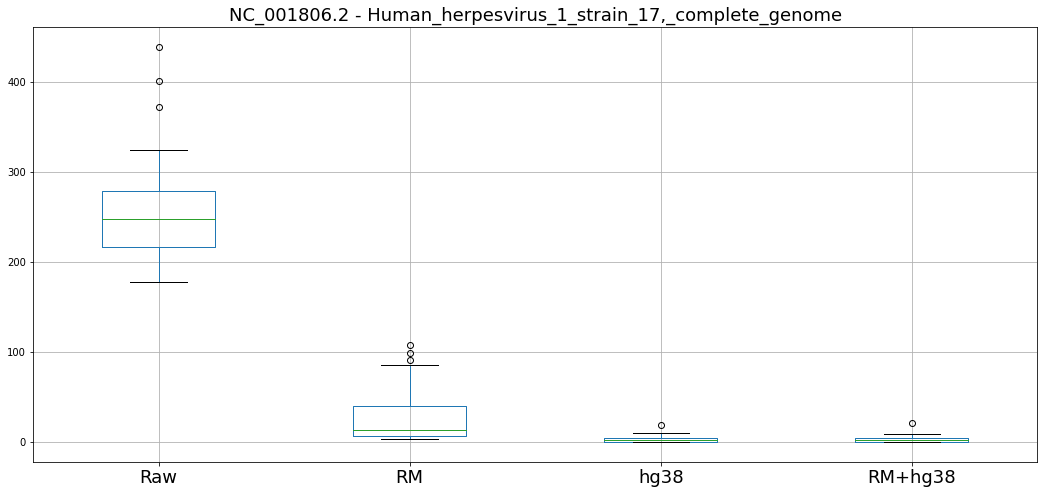

raw      NC_006273.2    2.624528
RM       NC_006273.2    2.624528
hg38     NC_006273.2    2.624528
RM+hg38  NC_006273.2    2.624528
dtype: float64


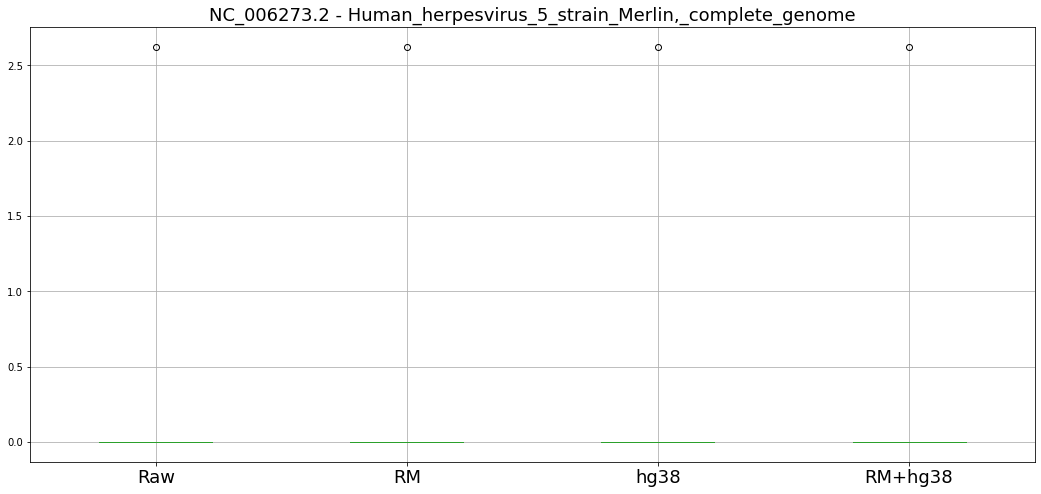

raw      NC_007605.1    16752.858209
RM       NC_007605.1    16772.824919
hg38     NC_007605.1       27.019205
RM+hg38  NC_007605.1       27.019205
dtype: float64


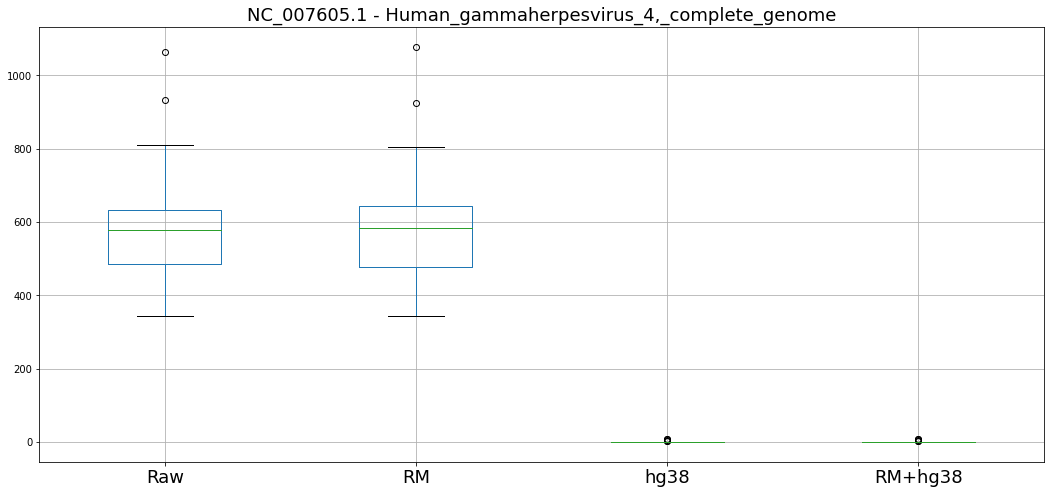

raw      NC_009333.1    1256.779870
RM       NC_009333.1    1236.874013
hg38     NC_009333.1       8.351709
RM+hg38  NC_009333.1      10.440041
dtype: float64


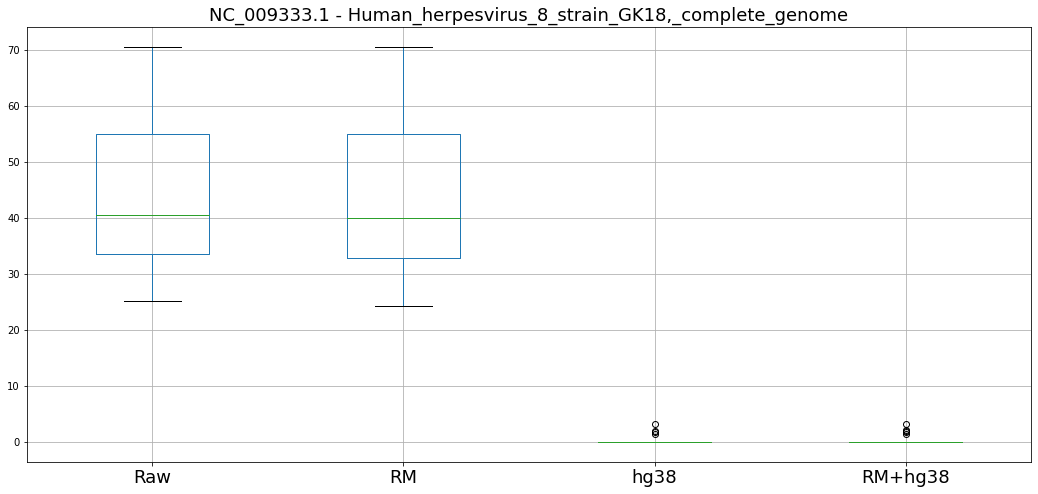

raw      NC_009334.1    43.517906
RM       NC_009334.1    43.517906
hg38     NC_009334.1    42.043516
RM+hg38  NC_009334.1    40.686349
dtype: float64


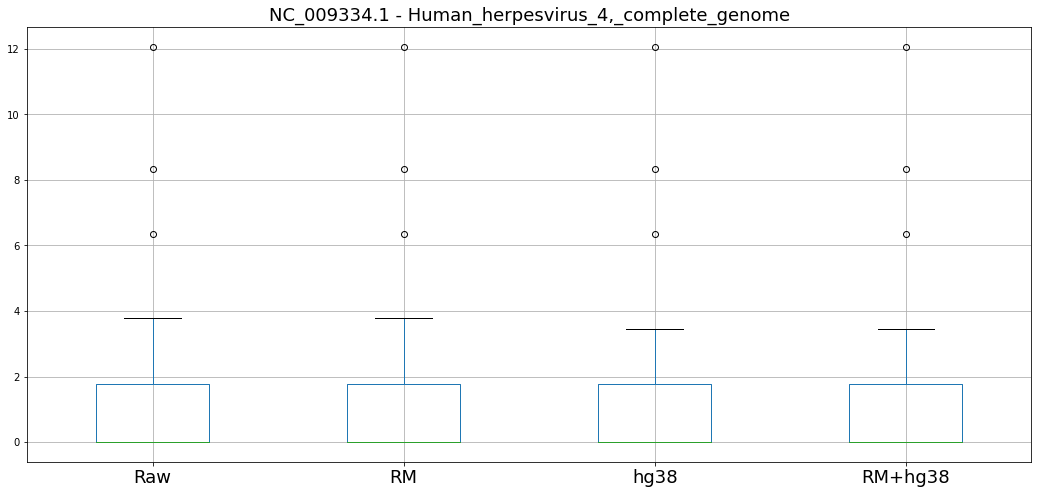

In [30]:
for index, row in viruses.iterrows():
    accession=row['accession']
    description=row['description']
    if( df.iloc[:, df.columns.get_level_values(1)==accession].sum()['raw',accession] > 0 ):
        print(df.iloc[:, df.columns.get_level_values(1)==accession].sum())
        tmp=df.iloc[:, df.columns.get_level_values(1)==accession]
        tmp.columns=["Raw","RM","hg38","RM+hg38"]
        tmp.boxplot()
        plt.title(accession+ " - " + description,fontsize = 18)
        plt.xticks(fontsize = 18)
        plt.show()

In [31]:
# Why is RM higher than raw here and nowhere else?
# View a few bam files and compare

df.iloc[:, df.columns.get_level_values(1)=='NC_001716.2'].sum()

raw      NC_001716.2    870938.795277
RM       NC_001716.2    872505.185677
hg38     NC_001716.2         5.688978
RM+hg38  NC_001716.2         3.960425
dtype: float64

In [32]:
df.iloc[:, df.columns.get_level_values(1)=='NC_001716.2']

,,,raw,RM,hg38,RM+hg38
,,,NC_001716.2,NC_001716.2,NC_001716.2,NC_001716.2
sample,read count,average length,,,,
02-2485-10A-01D-1494,478851061,101,32987.292473,33095.885737,2.088332,2.088332
06-0125-10A-01D-1490,695377506,101,31193.128643,31227.642270,0.000000,0.000000
06-0157-10A-01D-1491,561676819,101,32589.915376,32691.397221,0.000000,0.000000
06-0171-10A-01D-A33C,721570484,101,34049.341741,34108.933979,0.000000,0.000000
06-0190-10B-01D-A32W,522679939,101,31508.766209,31522.158726,0.000000,0.000000
06-0210-10A-01D-1491,628825315,101,31775.120249,31819.647719,0.000000,0.000000
06-0211-10A-01D-1491,762041774,101,28129.691483,28132.316011,0.000000,0.000000
06-0214-10A-01D-1491,573345114,101,31501.096912,31619.699126,0.000000,0.000000


/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


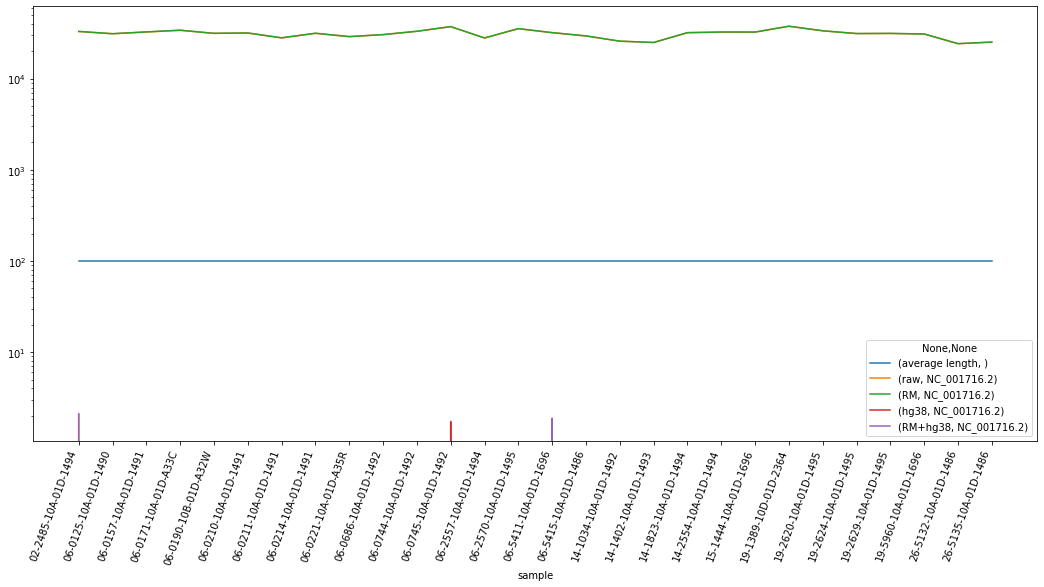

In [33]:
data=df.iloc[:, df.columns.get_level_values(1)=='NC_001716.2']

ax=data.reset_index().drop('read count',axis='columns').set_index('sample').plot(logy=True)

ax.set_xticks(range(len(data)))
ax.set_xticklabels(data.index.get_level_values(0))

plt.xticks(rotation=70,ha='right')
plt.show()


/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


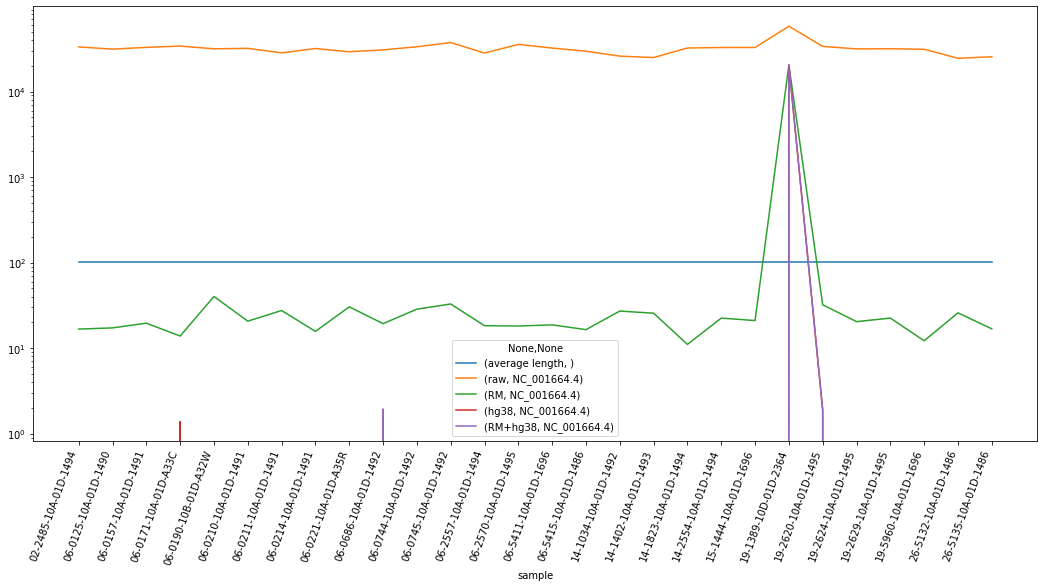

In [34]:
data=df.iloc[:, df.columns.get_level_values(1)=='NC_001664.4']

ax=data.reset_index().drop('read count',axis='columns').set_index('sample').plot(logy=True)

ax.set_xticks(range(len(data)))
ax.set_xticklabels(data.index.get_level_values(0))

plt.xticks(rotation=70,ha='right')
plt.show()


Note that the shorter reads have a higher alignment count.

Hard to compare different read length results.

raw      NC_000898.1    897344.219136
RM       NC_000898.1     28277.893007
hg38     NC_000898.1     28265.167391
RM+hg38  NC_000898.1     28100.253276
dtype: float64


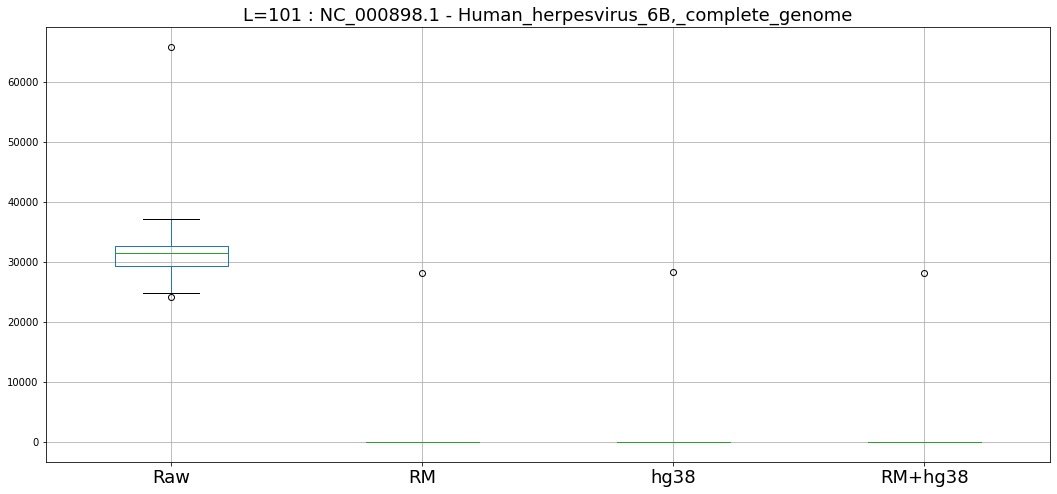

raw      NC_001664.4    896869.761821
RM       NC_001664.4     21040.839825
hg38     NC_001664.4     20447.148184
RM+hg38  NC_001664.4     20458.733091
dtype: float64


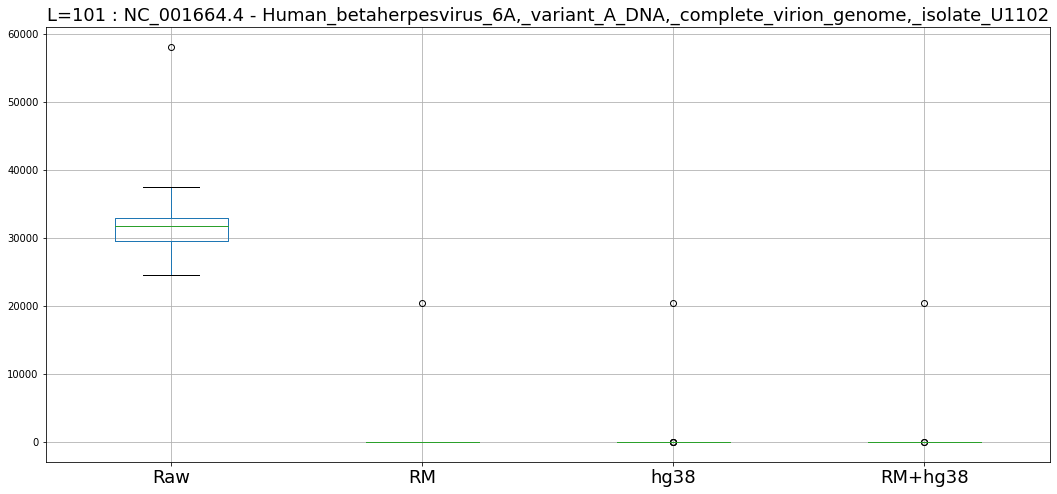

raw      NC_001716.2    870938.795277
RM       NC_001716.2    872505.185677
hg38     NC_001716.2         5.688978
RM+hg38  NC_001716.2         3.960425
dtype: float64


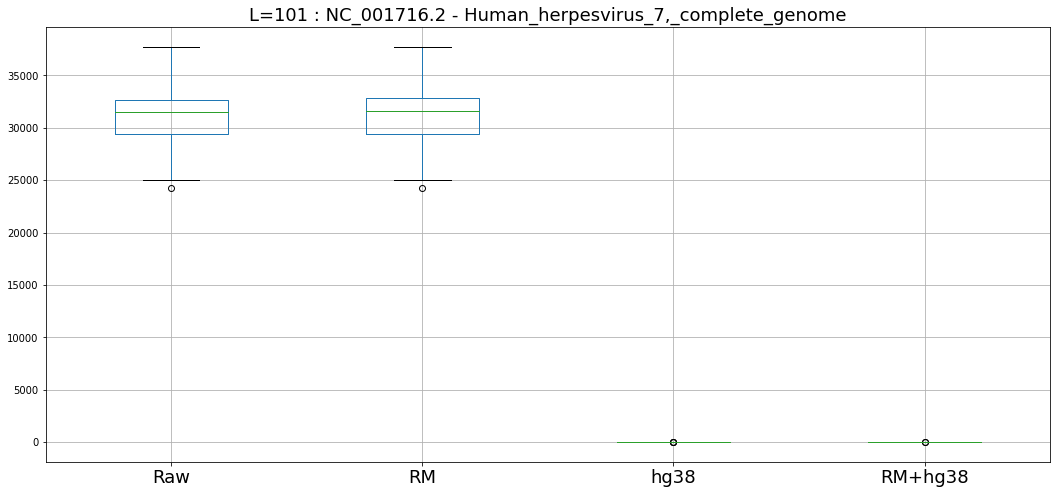

raw      NC_001798.2    3241.915984
RM       NC_001798.2    3145.736792
hg38     NC_001798.2      19.072489
RM+hg38  NC_001798.2      16.358156
dtype: float64


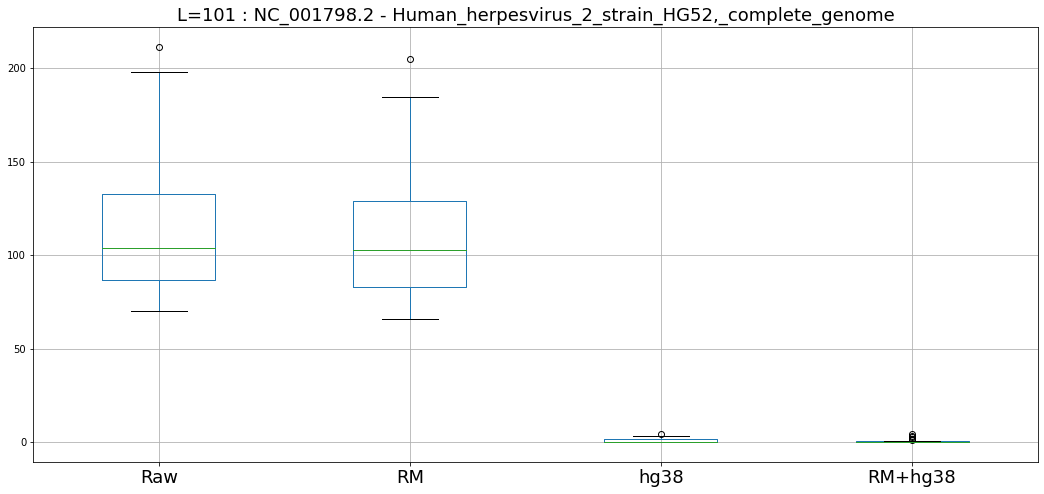

raw      NC_001806.2    7229.496546
RM       NC_001806.2     836.344295
hg38     NC_001806.2      86.153503
RM+hg38  NC_001806.2      81.793976
dtype: float64


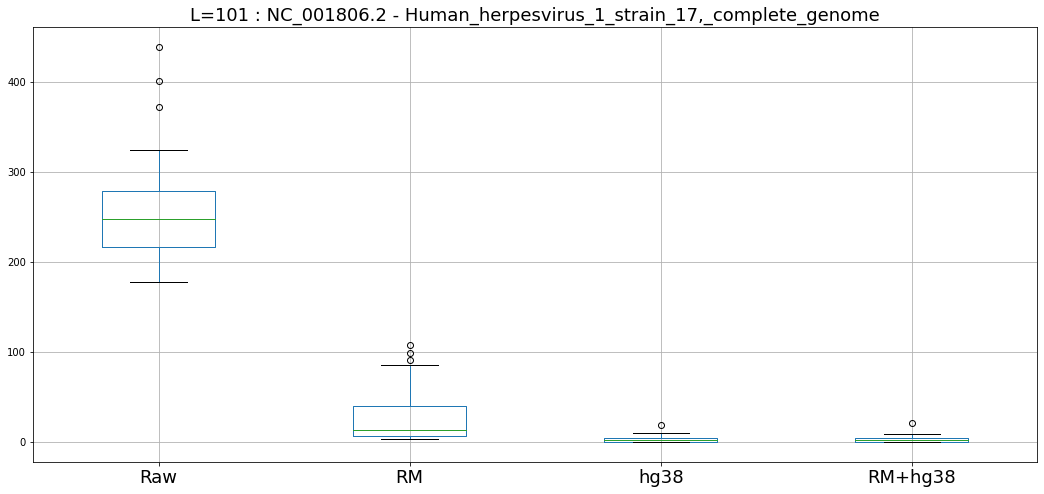

raw      NC_006273.2    2.624528
RM       NC_006273.2    2.624528
hg38     NC_006273.2    2.624528
RM+hg38  NC_006273.2    2.624528
dtype: float64


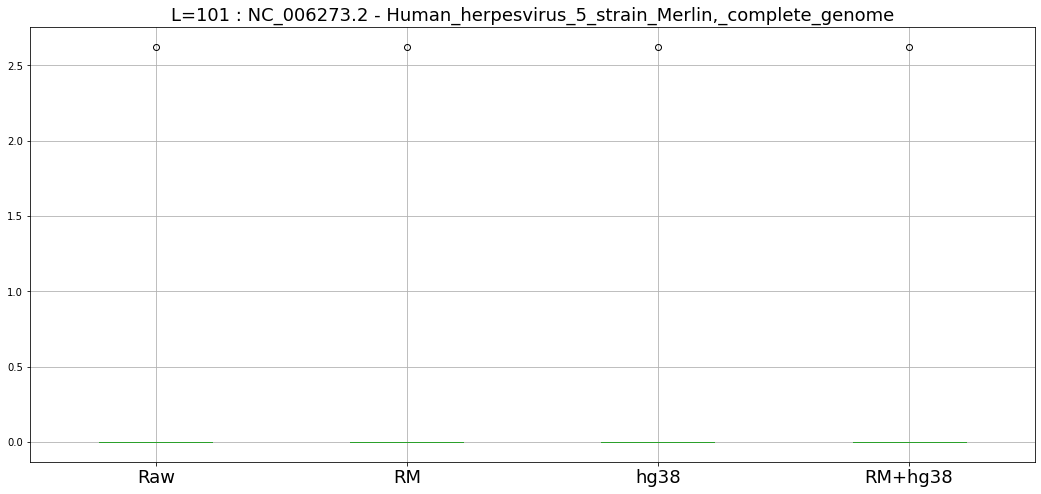

raw      NC_007605.1    16752.858209
RM       NC_007605.1    16772.824919
hg38     NC_007605.1       27.019205
RM+hg38  NC_007605.1       27.019205
dtype: float64


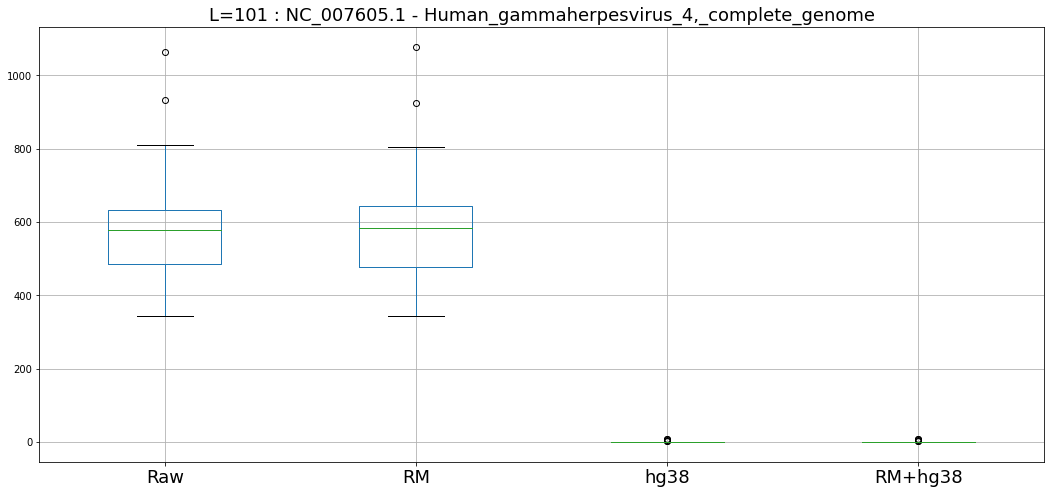

raw      NC_009333.1    1256.779870
RM       NC_009333.1    1236.874013
hg38     NC_009333.1       8.351709
RM+hg38  NC_009333.1      10.440041
dtype: float64


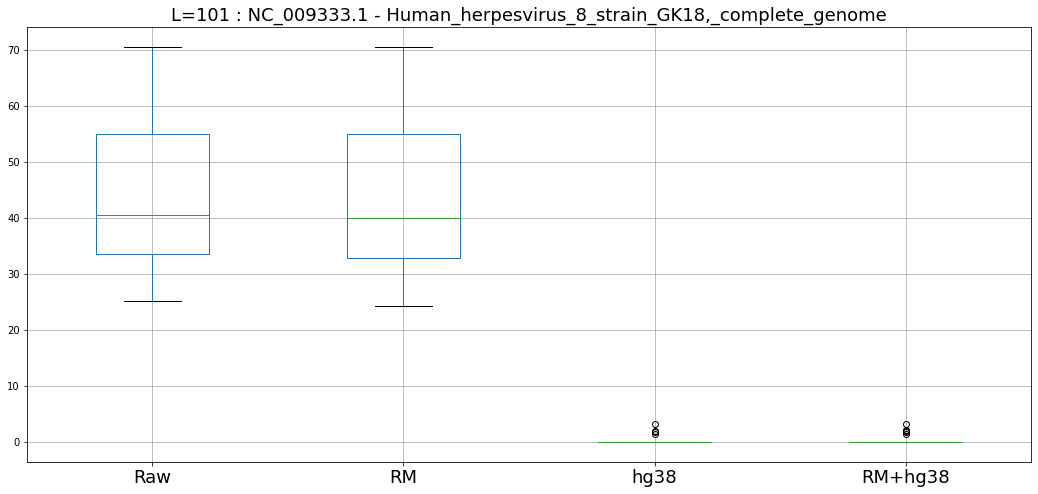

raw      NC_009334.1    43.517906
RM       NC_009334.1    43.517906
hg38     NC_009334.1    42.043516
RM+hg38  NC_009334.1    40.686349
dtype: float64


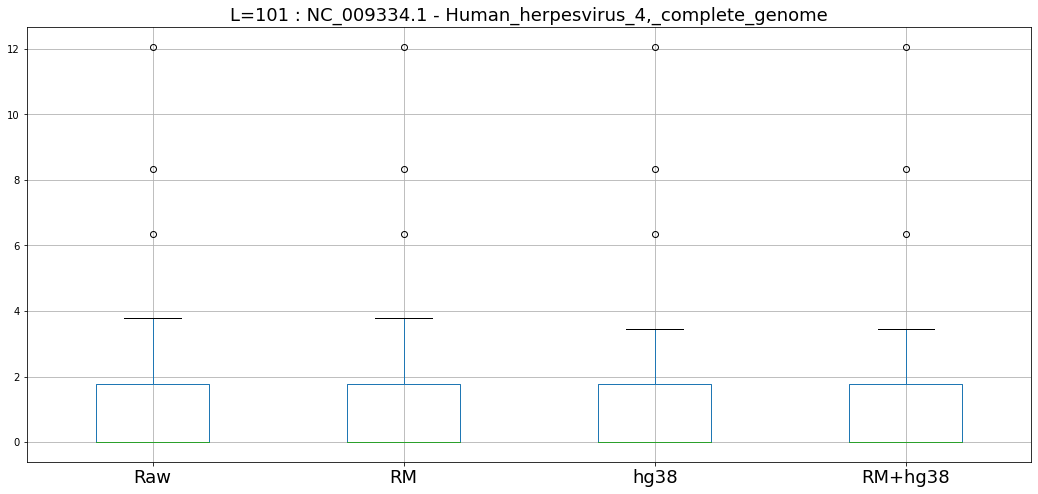

In [35]:
#length=101

for index, row in viruses.iterrows():
    accession=row['accession']
    description=row['description']
    for length in [51,101,151]:
        if( df.iloc[df.index.get_level_values(2)==length, df.columns.get_level_values(1)==accession].sum(
                )['raw',accession] > 0 ):
            print(df.iloc[df.index.get_level_values(2)==length, df.columns.get_level_values(1)==accession].sum())
            tmp=df.iloc[df.index.get_level_values(2)==length, df.columns.get_level_values(1)==accession]
            tmp.columns=["Raw","RM","hg38","RM+hg38"]
            tmp.boxplot()
            plt.title("L="+str(length)+" : "+accession+ " - " + description,fontsize = 18)
            plt.xticks(fontsize = 18)
            plt.show()
        

/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


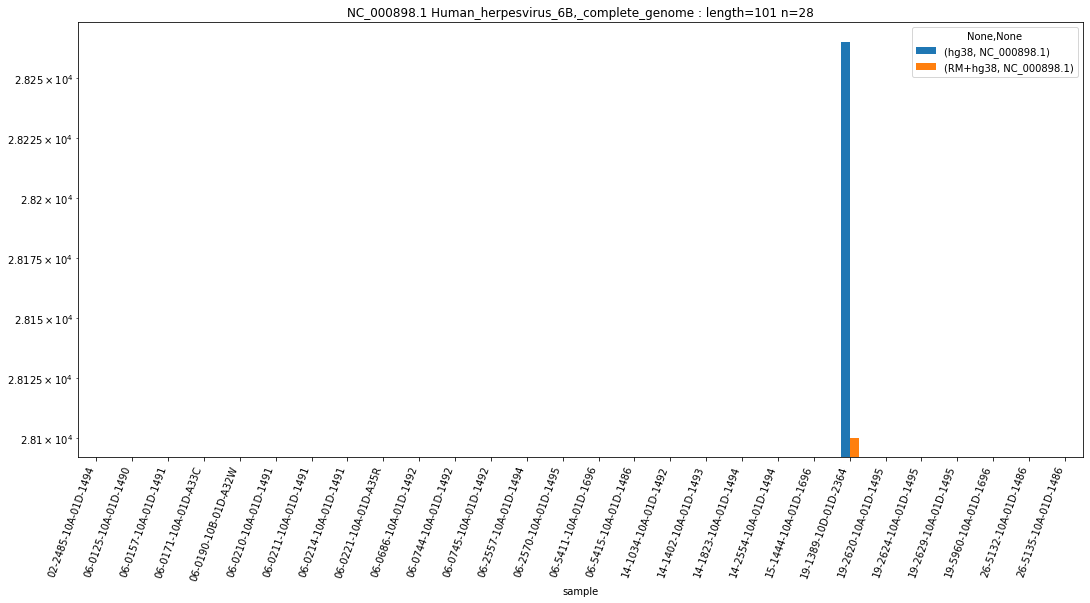

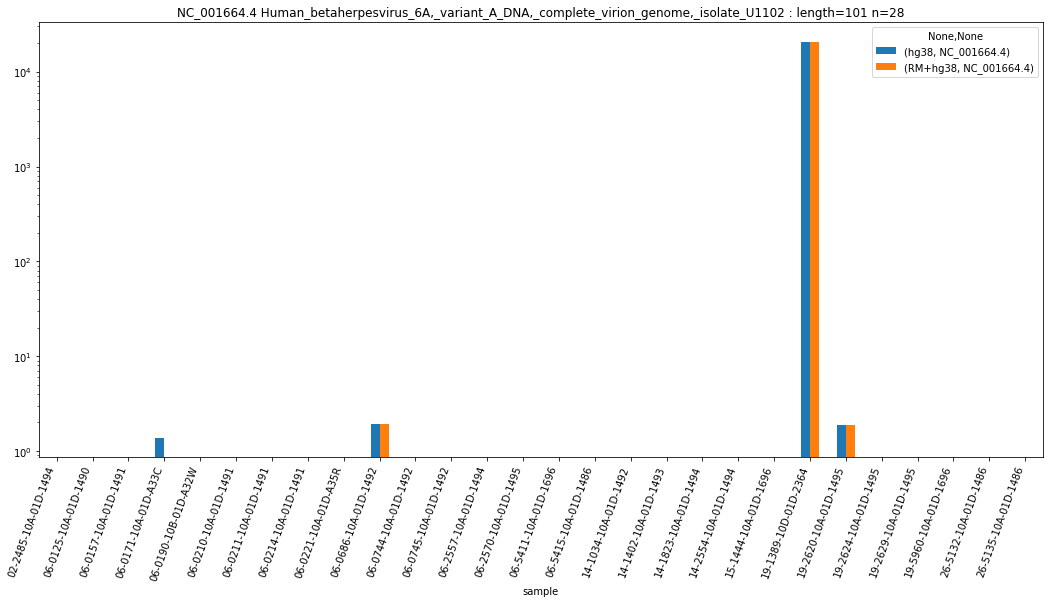

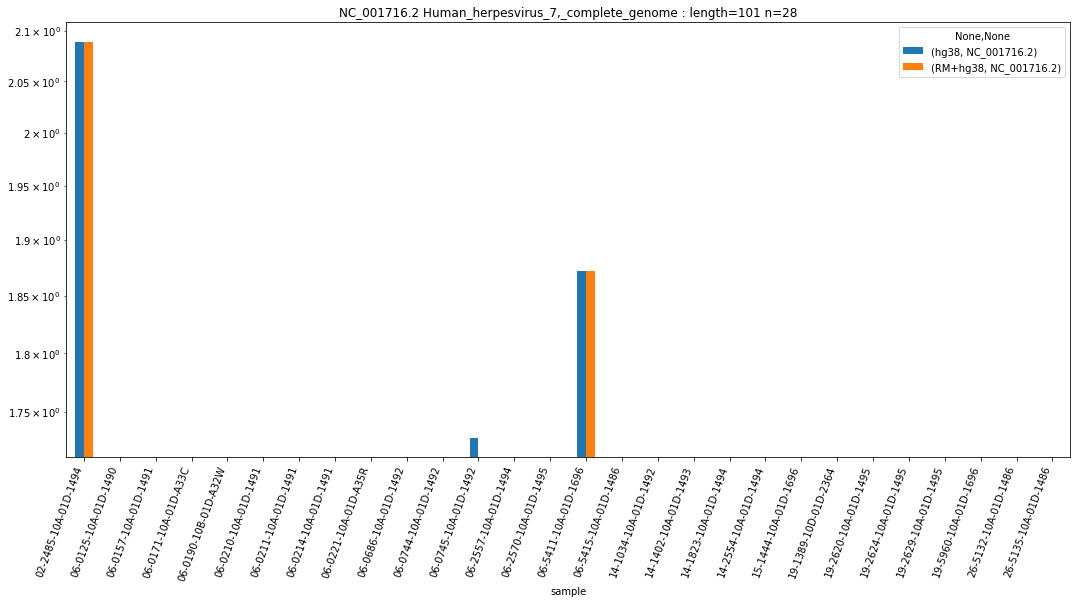

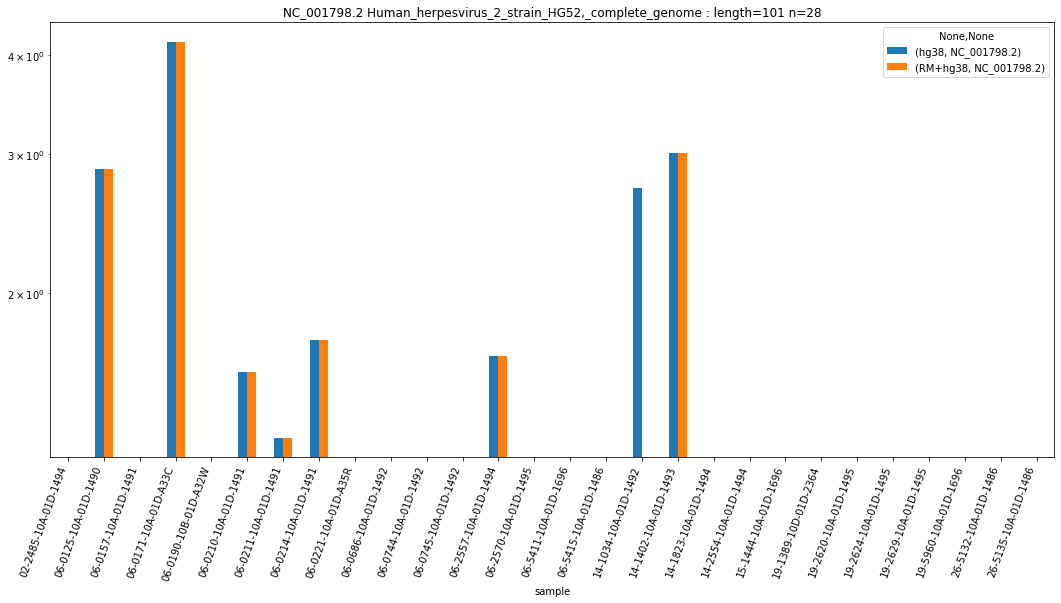

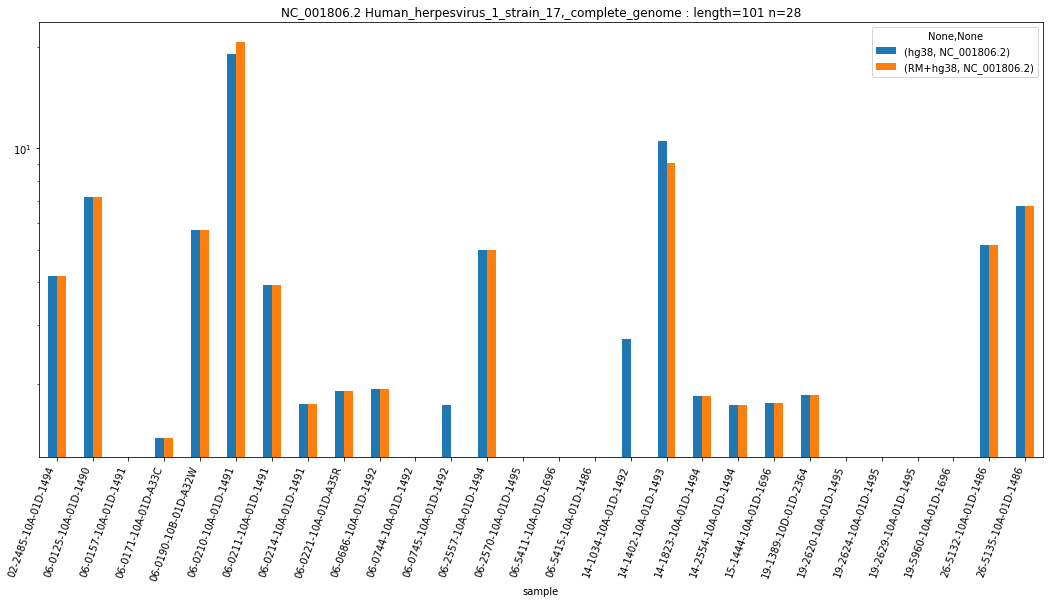

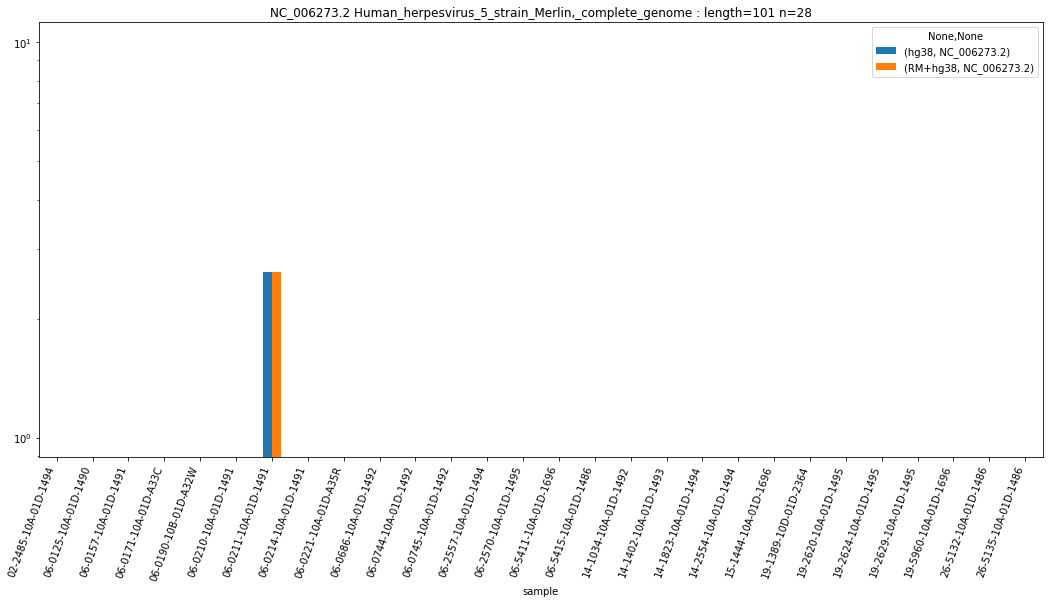

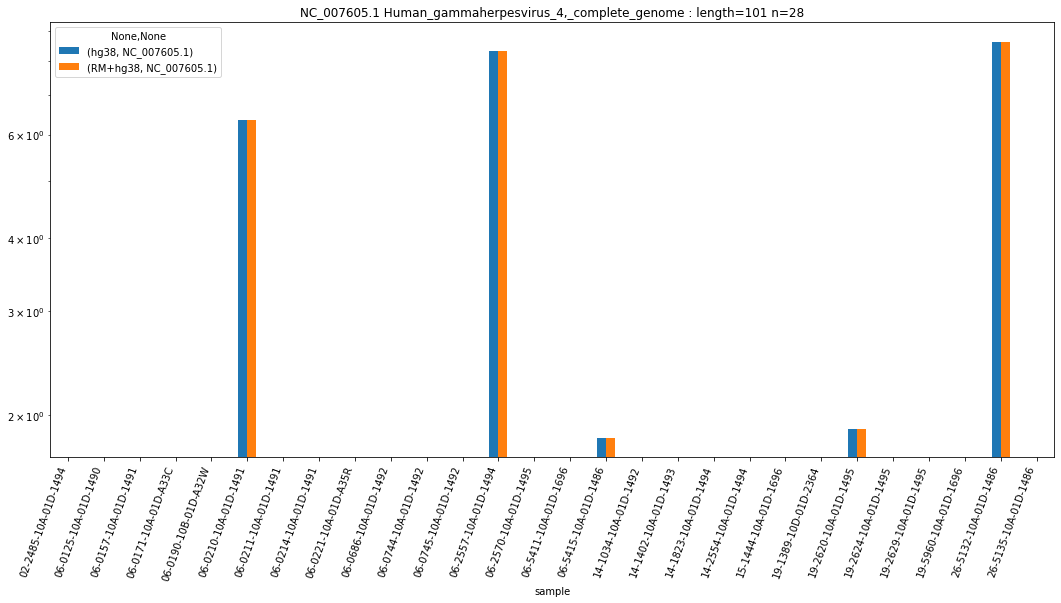

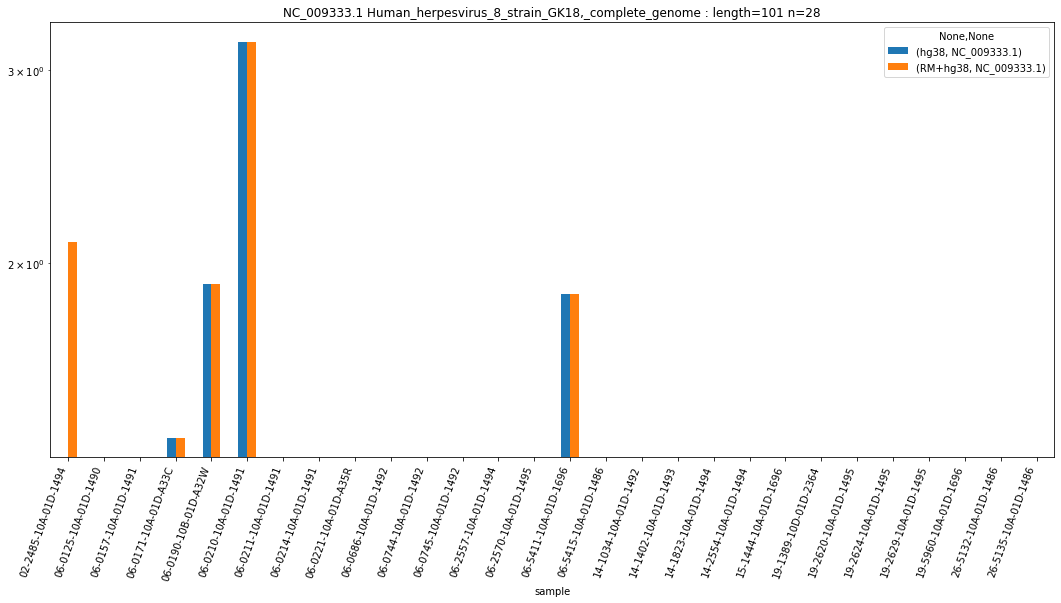

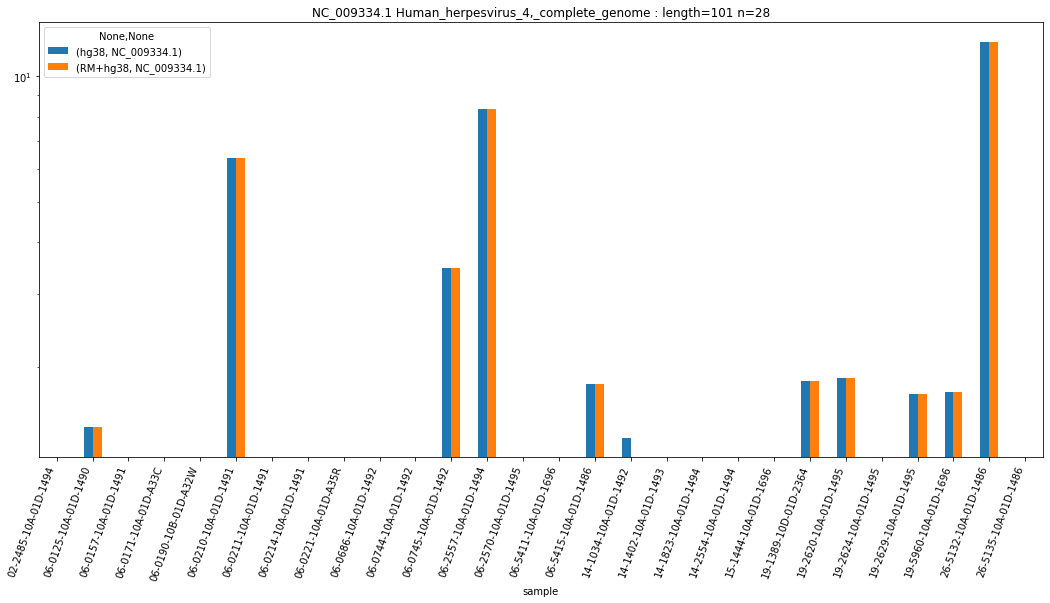

In [36]:
#virus='NC_001716.2'
#for virus in ['NC_001664.4','NC_001716.2','NC_006273.2','NC_009333.1','NC_009334.1']:
for index, row in viruses.iterrows():
    virus=row['accession']
    desc=row['description']
    for length in [51,101,151]:
        data=df.iloc[df.index.get_level_values(2)==length, df.columns.get_level_values(1)==virus].copy()
        if(len(data) > 0):
            ax=data.reset_index().drop(['read count','average length','raw','RM'],
                                       axis='columns').set_index('sample').plot(kind='bar',logy=True)
            ax.set_xticks(range(len(data)))
            ax.set_xticklabels(data.index.get_level_values(0))

            plt.title(virus+" "+desc+" : length="+str(length)+" n="+str(len(data)))
            plt.xticks(rotation=70,ha='right')
            plt.show()


https://ada.com/conditions/human-herpesvirus/#herpes-simplex


* HHV-1 1806 = 90%
* HHV-2 1798 = 10-30%
* HHV-4 (EBV) 7605,9334 = 90% 
* HHV-5 (CMV) 6273 = 60-90% 
* HHV-6 898,1664 = 20-95%
* HHV-7 1716 = 90%
* HHV-8 (KSHV) 9333 = 5% or 30-80%

No human masked regions so excluded
* HHV-3 (VZV) 1348 = 


I have a strong suspicion that the data used was only reads aligned to human?


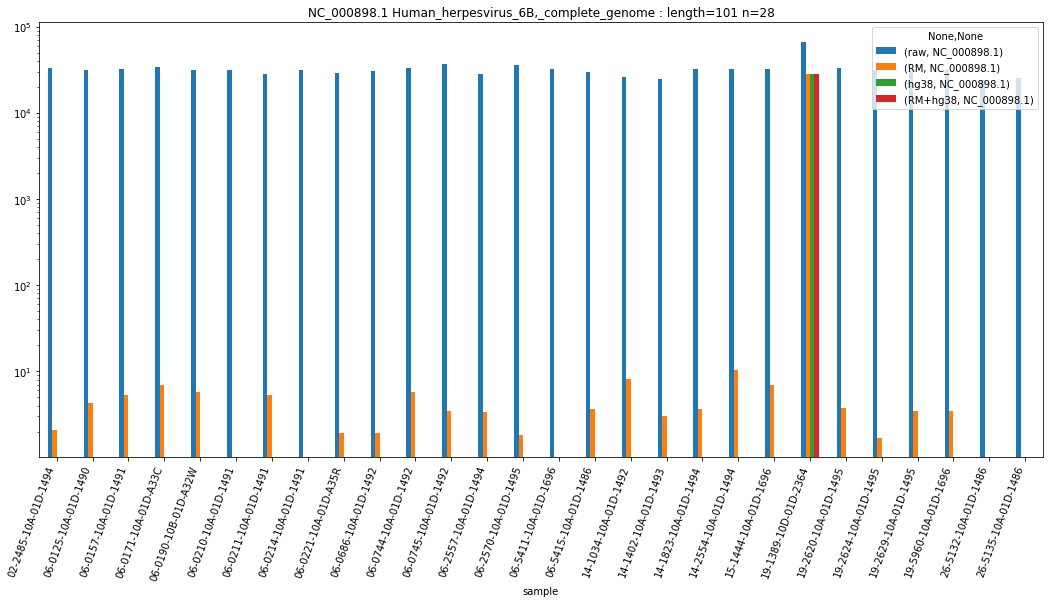

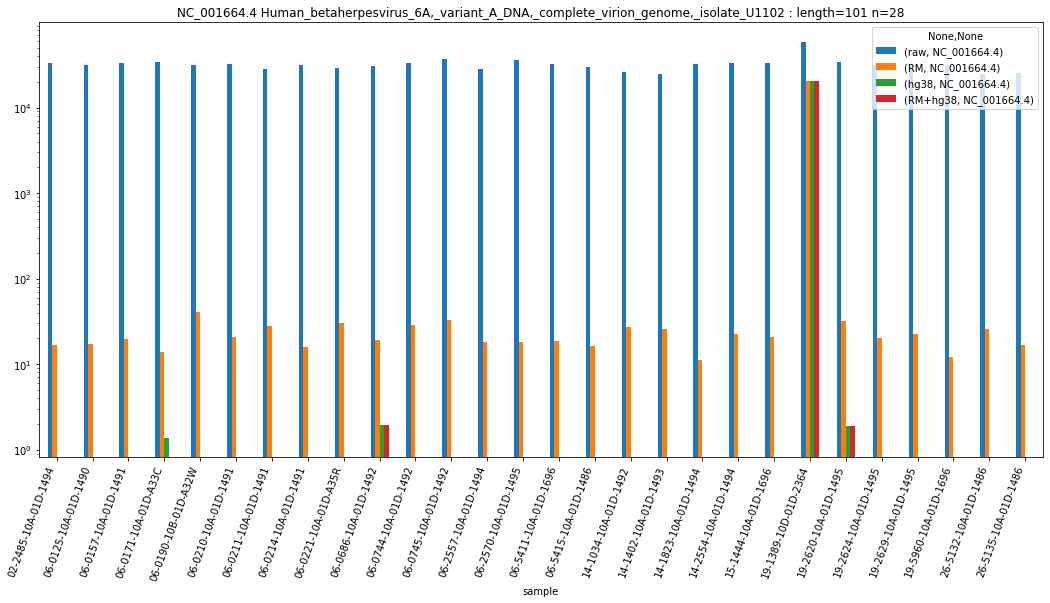

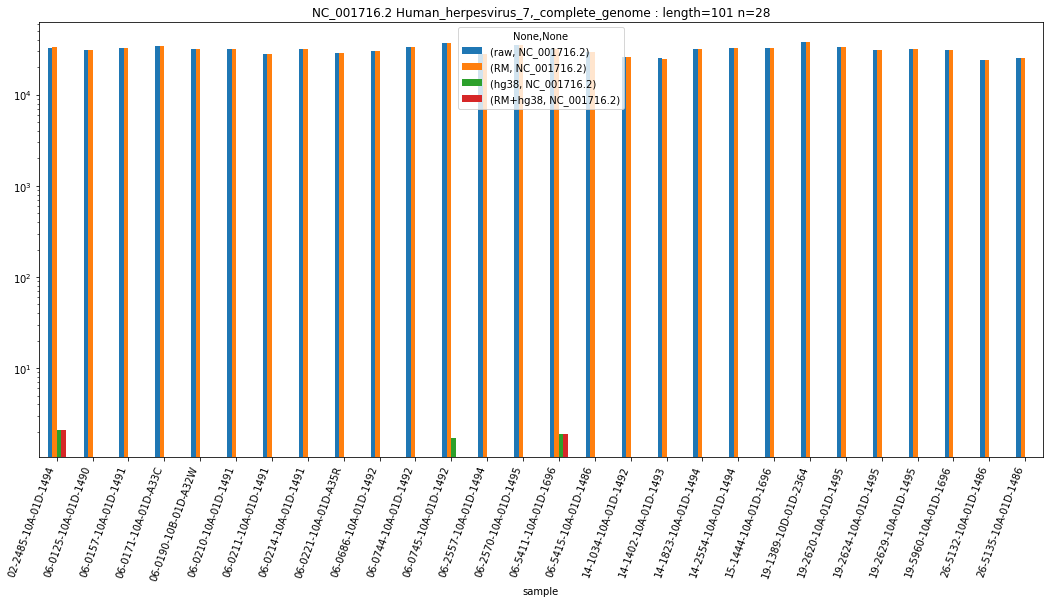

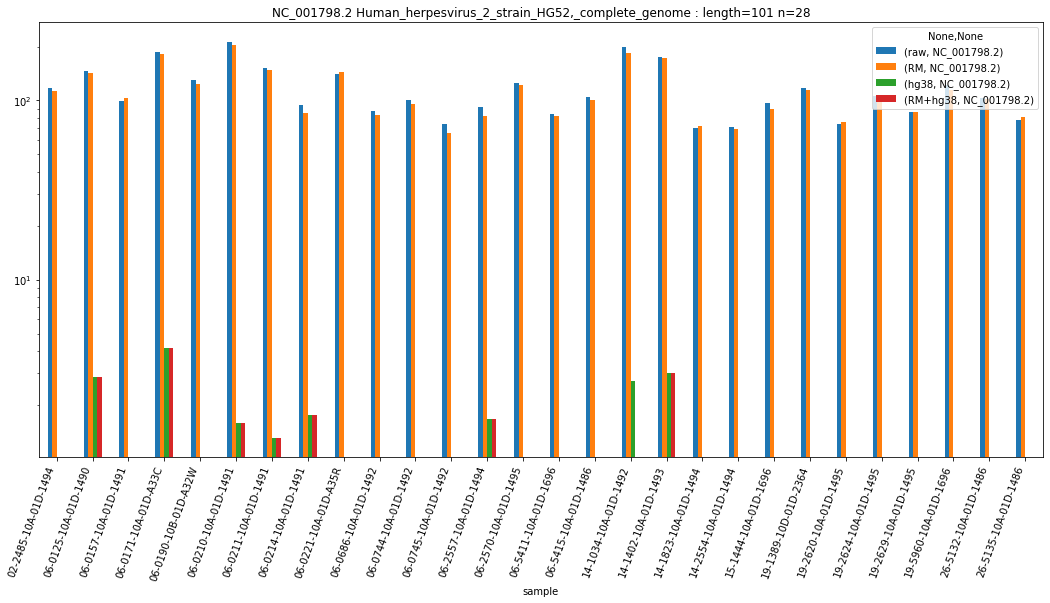

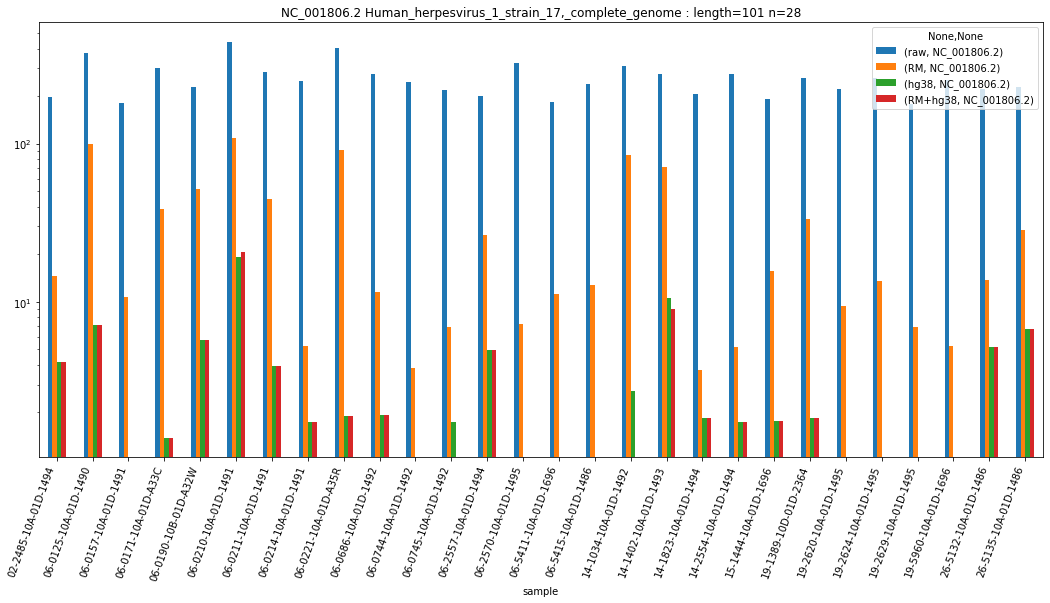

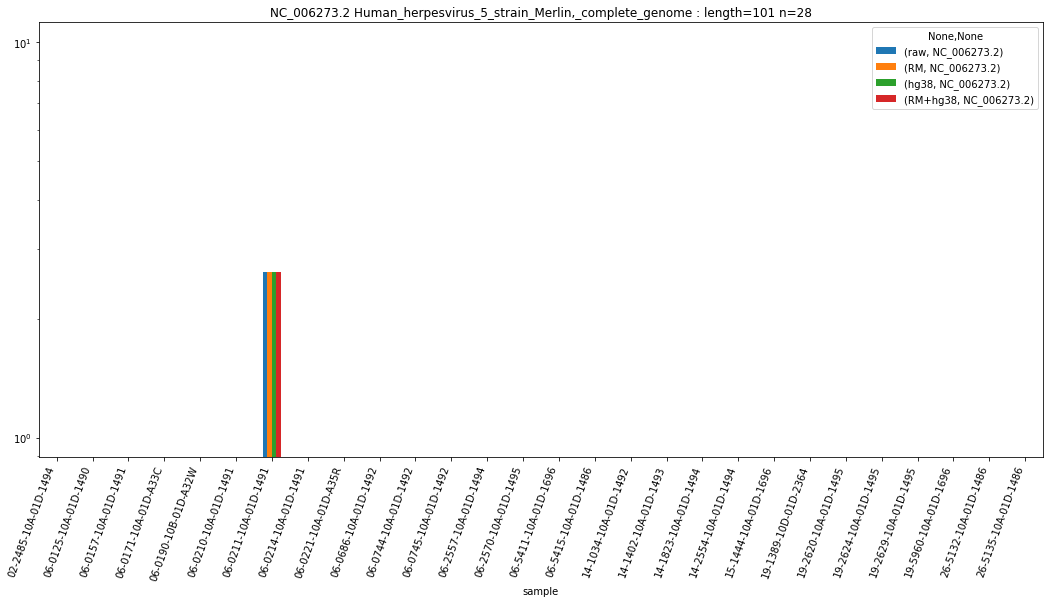

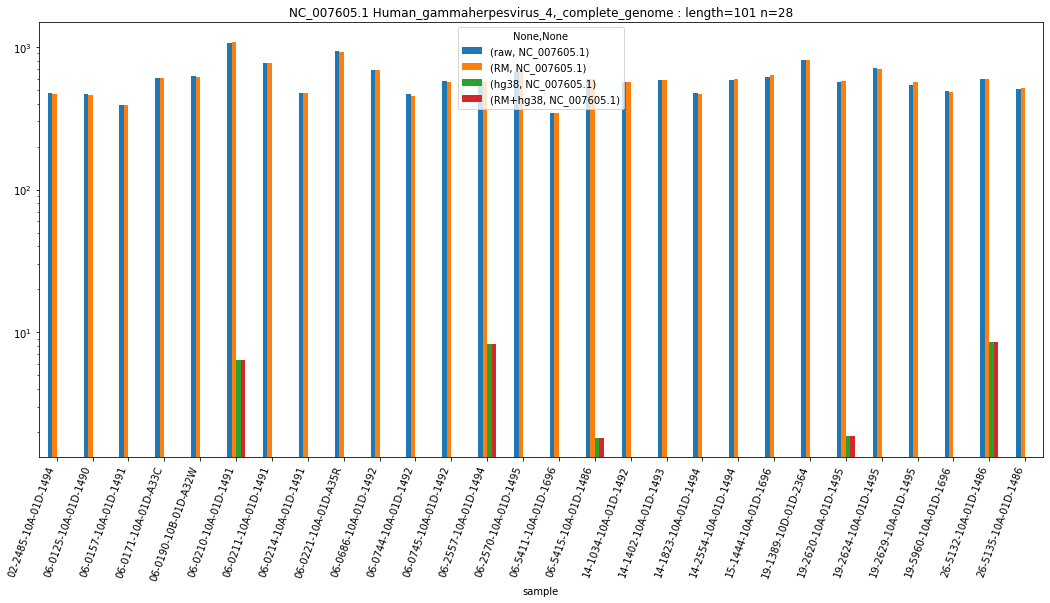

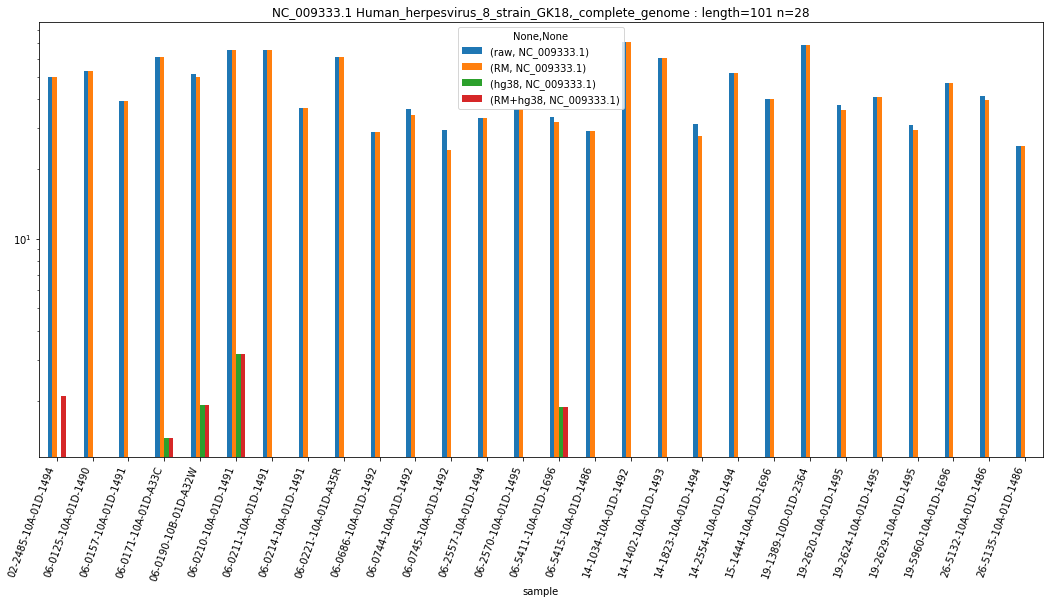

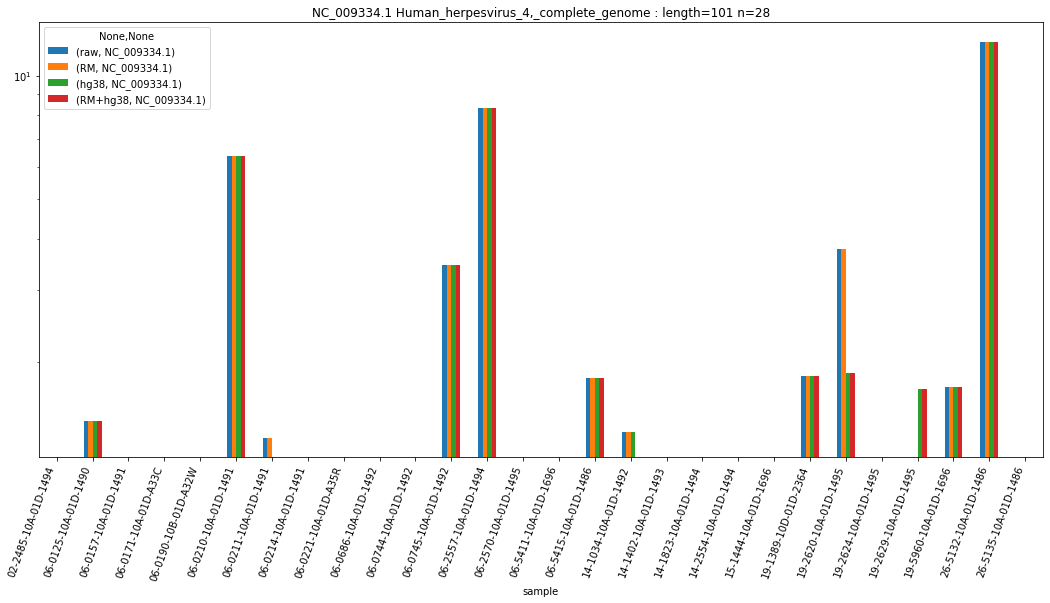

In [37]:
for index, row in viruses.iterrows():
    virus=row['accession']
    desc=row['description']
    for length in [51,101,151]:
        data=df.iloc[df.index.get_level_values(2)==length, df.columns.get_level_values(1)==virus].copy()
        if(len(data) > 0):
            ax=data.reset_index().drop(['read count','average length'],
                                       axis='columns').set_index('sample').plot(kind='bar',logy=True)
            ax.set_xticks(range(len(data)))
            ax.set_xticklabels(data.index.get_level_values(0))

            plt.title(virus+" "+desc+" : length="+str(length)+" n="+str(len(data)))
            plt.xticks(rotation=70,ha='right')
            plt.show()


In [38]:
pd.set_option('display.max_rows',default_max_rows)

In [39]:
pd.set_option('display.max_colwidth', default_max_colwidth)

https://github.com/ucsffrancislab/genomics/blob/master/data/20210604-GPMP-GBM/20210608-hkle-chimera/Analysis%20HERVK113%2010000.ipynb

https://github.com/ucsffrancislab/genomics/blob/master/data/20211122-Homology-Paper/analysis.ipynb

https://github.com/ucsffrancislab/genomics/blob/master/data/20211122-Homology-Paper/bowtie2_analysis.ipynb